In [2]:
# Libraries
# import codecademylib3_seaborn
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
link_w = "https://content.codecademy.com/courses/beautifulsoup/cacao/index.html"

webpage = requests.get(link_w)

soup = BeautifulSoup(webpage.content, "html.parser")

# rating_tags = soup.find_all(attrs={"class": "Rating"})
rating_tags = soup.select(".Rating")
company_tags = soup.select(".Company")
cocoa_percent_tags = soup.select(".CocoaPercent")
origin_tags = soup.select(".BroadBeanOrigin")

ratings = []
companies = []
cocoa_percents = []
origins = []

for td in rating_tags[1:]:
    rating = float(td.get_text())
    ratings.append(rating)

for td in company_tags[1:]:
    companies.append(td.get_text())

for td in cocoa_percent_tags[1:]:
    percent = float(td.get_text().strip('%'))
    cocoa_percents.append(percent)
    
for td in origin_tags[1:]:
    origins.append(td.get_text())
    
chocolate_data = {"Company": companies, "Rating": ratings}
# chocolate_data_df = pd.DataFrame.from_dict(chocolate_data)

chocolate_data["CocoaPercentage"] = cocoa_percents
# chocolate_data_df = pd.DataFrame.from_dict(chocolate_data)

chocolate_data["BroadBeanOrigin"] = origins
chocolate_data_df = pd.DataFrame.from_dict(chocolate_data)

print(chocolate_data_df)

       Company  Rating  CocoaPercentage BroadBeanOrigin
0     A. Morin    3.75             63.0        Sao Tome
1     A. Morin    2.75             70.0            Togo
2     A. Morin    3.00             70.0            Togo
3     A. Morin    3.50             70.0            Togo
4     A. Morin    3.50             70.0            Peru
...        ...     ...              ...             ...
1790    Zotter    3.75             70.0            Peru
1791    Zotter    3.00             65.0           Congo
1792    Zotter    3.50             65.0           India
1793    Zotter    3.25             62.0           India
1794    Zotter    3.00             65.0          Brazil

[1795 rows x 4 columns]


In [25]:
# Analysis
mean_ratings = chocolate_data_df.groupby("Company").Rating.mean()
ten_best = mean_ratings.nlargest(10)
print('-'*5 + 'Ten best by Company' + '-'*5)
print(ten_best)
print('-'*15)

mean_ratings_by_origin = chocolate_data_df.groupby("BroadBeanOrigin").Rating.mean()
ten_best_by_origin = mean_ratings_by_origin.nlargest(10)
print('-'*5 + 'Ten best by Origin' + '-'*5)
print(ten_best_by_origin)
print('-'*15)

mean_ratings_by_cocoa = chocolate_data_df.groupby("BroadBeanOrigin").CocoaPercentage.mean()
ten_best_by_cocoap = mean_ratings_by_cocoa.nlargest(15)
print('-'*5 + 'Ten best by Origin' + '-'*5)
print(ten_best_by_cocoap)
print('-'*15)

-----Ten best by Company-----
Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64
---------------
-----Ten best by Origin-----
BroadBeanOrigin
Dom. Rep., Madagascar           4.00
Gre., PNG, Haw., Haiti, Mad     4.00
Guat., D.R., Peru, Mad., PNG    4.00
Peru, Dom. Rep                  4.00
Ven, Bolivia, D.R.              4.00
Venezuela, Java                 4.00
DR, Ecuador, Peru               3.75
Dominican Rep., Bali            3.75
PNG, Vanuatu, Mad               3.75
Peru, Belize                    3.75
Name: Rating

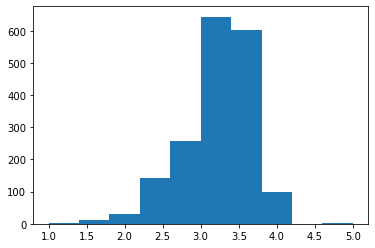

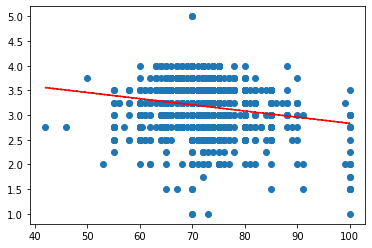

In [9]:
# Plots
# Distribution of ratings
plt.hist(ratings)
plt.show()
plt.clf()
# Relation between cocoa percentage and rating
plt.scatter(chocolate_data_df.CocoaPercentage, chocolate_data_df.Rating)
# Linear fit
z = np.polyfit(chocolate_data_df.CocoaPercentage, chocolate_data_df.Rating, 1)
line_function = np.poly1d(z)
# Plot line
plt.plot(chocolate_data_df.CocoaPercentage, line_function(chocolate_data_df.CocoaPercentage), "r--")
plt.show()

In [13]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
<script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<